In [1]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,0,40.0,0.0,1400.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,63.0
1,1,48.0,4.0,2850.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,86.0
2,2,39.0,0.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
3,3,46.0,5.0,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0
4,4,43.0,1.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0


In [4]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,10000.0,4999.5000,2886.895680,0.0,2499.75,4999.5,7499.25,9999.0
age,10000.0,45.8780,8.043929,23.0,40.00,46.0,51.00,68.0
years_of_experience,10000.0,1.9868,1.772213,0.0,0.00,2.0,3.00,10.0
lesson_price,10000.0,1699.1050,524.886654,200.0,1300.00,1500.0,2150.00,3950.0
qualification,10000.0,1.7195,0.792264,1.0,1.00,2.0,2.00,4.0
physics,10000.0,0.3750,0.484147,0.0,0.00,0.0,1.00,1.0
chemistry,10000.0,0.1329,0.339484,0.0,0.00,0.0,0.00,1.0
biology,10000.0,0.1096,0.312406,0.0,0.00,0.0,0.00,1.0
english,10000.0,0.0537,0.225436,0.0,0.00,0.0,0.00,1.0
geography,10000.0,0.0321,0.176274,0.0,0.00,0.0,0.00,1.0


In [5]:
train['lesson_price'].describe()

count    10000.000000
mean      1699.105000
std        524.886654
min        200.000000
25%       1300.000000
50%       1500.000000
75%       2150.000000
max       3950.000000
Name: lesson_price, dtype: float64

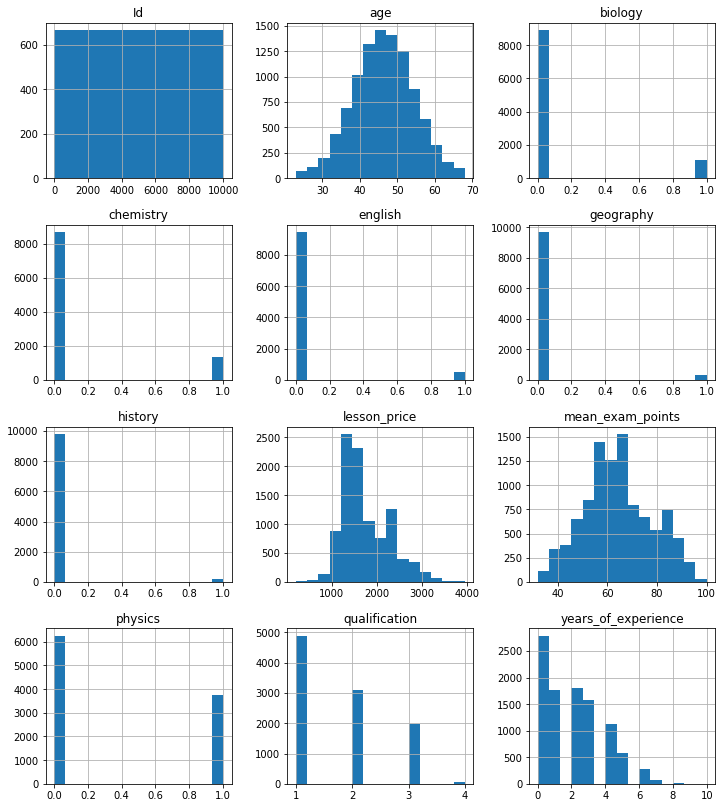

In [6]:
train.hist(figsize =(12,14),bins = 15, grid = True)
plt.show()

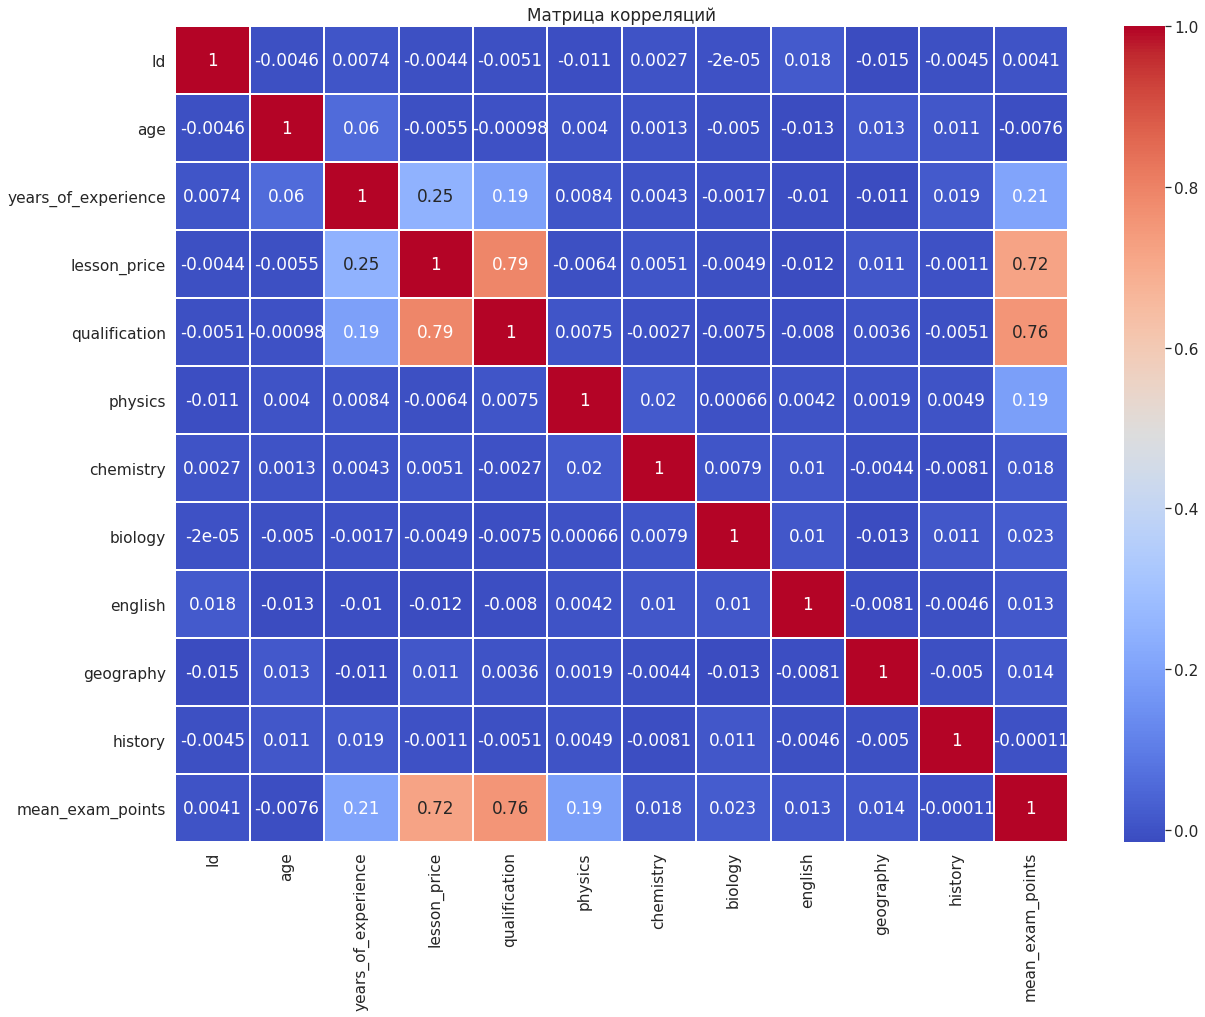

In [7]:
plt.figure(figsize = (20,15))

sns.set(font_scale=1.4)

corr_matrix = train.corr()
corr_matrix = np.round(corr_matrix, 5)

sns.heatmap(corr_matrix, annot=True, linewidths=1, cmap='coolwarm')

plt.title('Матрица корреляций')
plt.show()

In [8]:
train.dtypes

Id                       int64
age                    float64
years_of_experience    float64
lesson_price           float64
qualification          float64
physics                float64
chemistry              float64
biology                float64
english                float64
geography              float64
history                float64
mean_exam_points       float64
dtype: object

In [9]:
# поиск пропусков

for col in train.columns:
    pct_missing = np.mean(train[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Id - 0.0%
age - 0.0%
years_of_experience - 0.0%
lesson_price - 0.0%
qualification - 0.0%
physics - 0.0%
chemistry - 0.0%
biology - 0.0%
english - 0.0%
geography - 0.0%
history - 0.0%
mean_exam_points - 0.0%


In [10]:
target_name = 'mean_exam_points'
features_name = ['age', 'years_of_experience', 'lesson_price', 'qualification', 'physics', 'chemistry', 'biology', 
                'english', 'geography', 'history']

In [11]:
X = train.drop(columns=target_name)
X = train[features_name].values
y = train[target_name].values
test_set = test[features_name].values

# Для начала отмасштабируем выборку
X = X.astype(float)

rows, cols = X.shape

# центрирование - вычитание из каждого значения среднего по строке
means = X.mean(0)
for i in range(rows):
    for j in range(cols):
        X[i, j] -= means[j]

# деление каждого значения на стандартное отклонение
std = np.std(X, axis=0)
for i in range(cols):
    for j in range(rows):
        X[j][i] /= std[i]

# Для начала отмасштабируем выборку
test_set = test_set.astype(float)

rows, cols = test_set.shape
# центрирование - вычитание из каждого значения среднего по строке
means = test_set.mean(0)
for i in range(rows):
    for j in range(cols):
        test_set[i, j] -= means[j]

# деление каждого значения на стандартное отклонение
std = np.std(test_set, axis=0)
for i in range(cols):
    for j in range(rows):
        test_set[j][i] /= std[i]

In [12]:
class PCA():
    def __init__(self, n_components):
        self.n_components = n_components

    def fit_transform(self, data):
        data_ = data.astype(float)
        # Для начала масштабируем выборку


        

        cov_matrix = data_.T.dot(data_) # Матрица ковариаций
        # Eigenvalues, eigenvectors / (Собственные значения, собственные вектора)
        eig_values, eig_vectors = np.linalg.eig(cov_matrix)
        # list of tuples (value, vector) / список кортежей (значение, вектор)
        eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:,i]) for i in range(len(eig_values))]
        # sorting the list in descending order eigenvalues / сортируем список по убыванию eig_values
        eig_pairs.sort(key=lambda x: x[0], reverse=True)

        eig_sum = sum(eig_values)
        var_exp = [(i / eig_sum) * 100 for i in sorted(eig_values, reverse=True)]
        cum_var_exp = np.cumsum(var_exp)

        w = np.hstack(([eig_pairs[i][1].reshape(data.shape[1], 1) for i in range(self.n_components)]))
        data_pca = data_.dot(w)
        return data_pca, print(f'Доля дисперсии, описываемая каждой компонентой \n'
        f'Proportion of variance described by each component \n{var_exp}'),\
    print(f'Кумулятивная доля дисперсии \n'
    f'Cumulative proportion of variance \n{cum_var_exp}')

In [13]:
most_correlated = ['years_of_experience','lesson_price','qualification']
pca = PCA(n_components=2)
#train_components = pca.fit_transform(train[most_correlated])
train_components = pca.fit_transform(train[features_name])
train_components

Доля дисперсии, описываемая каждой компонентой 
Proportion of variance described by each component 
[99.9920112503768, 0.007871047404855787, 9.27329212367372e-05, 7.58347207679275e-06, 7.4553049974010665e-06, 3.648346126634088e-06, 3.091999229101818e-06, 1.6085350737522699e-06, 9.809538809253833e-07, 6.006857061818646e-07]
Кумулятивная доля дисперсии 
Cumulative proportion of variance 
[ 99.99201125  99.9998823   99.99997503  99.99998261  99.99999007
  99.99999372  99.99999681  99.99999842  99.9999994  100.        ]


(                0          1
 0    -1400.560086   5.482780
 1    -2850.321925 -22.214649
 2    -1200.596176   9.405345
 3    -1400.713386  11.536889
 4    -1500.604444   6.022993
 ...           ...        ...
 9995 -1700.568296   2.084437
 9996 -1700.740478   9.073176
 9997 -1250.459099   3.194157
 9998 -1100.482251   5.910344
 9999 -1450.421450  -0.754099
 
 [10000 rows x 2 columns],
 None,
 None)

In [14]:
pca_train = train_components[0][:].values
pca_train

array([[-1.40056009e+03,  5.48278039e+00],
       [-2.85032192e+03, -2.22146491e+01],
       [-1.20059618e+03,  9.40534494e+00],
       ...,
       [-1.25045910e+03,  3.19415688e+00],
       [-1.10048225e+03,  5.91034419e+00],
       [-1.45042145e+03, -7.54099355e-01]])

In [15]:
X = np.hstack((X, pca_train))
X

array([[ 4.00000000e+01,  0.00000000e+00,  1.40000000e+03, ...,
         0.00000000e+00, -1.40056009e+03,  5.48278039e+00],
       [ 4.80000000e+01,  4.00000000e+00,  2.85000000e+03, ...,
         0.00000000e+00, -2.85032192e+03, -2.22146491e+01],
       [ 3.90000000e+01,  0.00000000e+00,  1.20000000e+03, ...,
         0.00000000e+00, -1.20059618e+03,  9.40534494e+00],
       ...,
       [ 3.40000000e+01,  1.00000000e+00,  1.25000000e+03, ...,
         0.00000000e+00, -1.25045910e+03,  3.19415688e+00],
       [ 3.30000000e+01,  3.00000000e+00,  1.10000000e+03, ...,
         0.00000000e+00, -1.10048225e+03,  5.91034419e+00],
       [ 3.50000000e+01,  0.00000000e+00,  1.45000000e+03, ...,
         0.00000000e+00, -1.45042145e+03, -7.54099355e-01]])

In [16]:
#test_components = pca.fit_transform(test[most_correlated])
test_components = pca.fit_transform(test[features_name])
pca_test = test_components[0][:].values
pca_test

Доля дисперсии, описываемая каждой компонентой 
Proportion of variance described by each component 
[99.99216932043565, 0.007710975205342153, 9.489153771279433e-05, 7.6155768435513655e-06, 7.1910632305153944e-06, 3.4635053693410483e-06, 3.333336978333057e-06, 1.674580758522134e-06, 9.628813315451407e-07, 5.718767977778402e-07]
Кумулятивная доля дисперсии 
Cumulative proportion of variance 
[ 99.99216932  99.9998803   99.99997519  99.9999828   99.99998999
  99.99999346  99.99999679  99.99999847  99.99999943 100.        ]


array([[-1.05082006e+03,  2.00234673e+01],
       [-1.85050079e+03, -2.78843158e+00],
       [-1.55081268e+03,  1.36185948e+01],
       ...,
       [-1.10048516e+03,  5.81733928e+00],
       [-1.75065188e+03,  4.64292537e+00],
       [-2.00060563e+03, -4.70227671e-01]])

In [17]:
test_set = np.hstack((test_set, pca_test))
test_set

array([[ 4.60000000e+01,  3.00000000e+00,  1.05000000e+03, ...,
         0.00000000e+00, -1.05082006e+03,  2.00234673e+01],
       [ 4.30000000e+01,  3.00000000e+00,  1.85000000e+03, ...,
         0.00000000e+00, -1.85050079e+03, -2.78843158e+00],
       [ 5.20000000e+01,  1.00000000e+00,  1.55000000e+03, ...,
         0.00000000e+00, -1.55081268e+03,  1.36185948e+01],
       ...,
       [ 3.30000000e+01,  5.00000000e+00,  1.10000000e+03, ...,
         0.00000000e+00, -1.10048516e+03,  5.81733928e+00],
       [ 4.80000000e+01,  0.00000000e+00,  1.75000000e+03, ...,
         0.00000000e+00, -1.75065188e+03,  4.64292537e+00],
       [ 4.90000000e+01,  5.00000000e+00,  2.00000000e+03, ...,
         0.00000000e+00, -2.00060563e+03, -4.70227671e-01]])

In [18]:
train_data, valid_data, train_labels, valid_labels = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [19]:
# Реализуем класс узла

class Node:
    
    def __init__(self, index, t, true_branch, false_branch):
        self.index = index  # индекс признака, по которому ведется сравнение с порогом в этом узле
        self.t = t  # значение порога
        self.true_branch = true_branch  # поддерево, удовлетворяющее условию в узле
        self.false_branch = false_branch  # поддерево, не удовлетворяющее условию в узле

In [20]:
# И класс терминального узла (листа)

class Leaf:
    
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        self.prediction = self.predict()
        
    def predict(self):
        #  найдем значение как среднее по выборке   
        prediction = np.mean(self.labels)
        return prediction

In [21]:
# И класс дерева
class Tree:

  def __init__(self, max_depth=50):
    self.max_depth = max_depth
    self.tree = None

  # Расчёт дисперсии значений
  def dispersion(self, labels):
    return np.std(labels)

  # Расчет качества

  def quality(self, left_labels, right_labels, current_dispersion):

    # доля выбоки, ушедшая в левое поддерево
    p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])
    
    return current_dispersion - p * self.dispersion(left_labels) - (1 - p) * self.dispersion(right_labels)

    # Разбиение датасета в узле

  def split(self, data, labels, index, t):
    
    left = np.where(data[:, index] <= t)
    right = np.where(data[:, index] > t)
        
    true_data = data[left]
    false_data = data[right]
    true_labels = labels[left]
    false_labels = labels[right]
        
    return true_data, false_data, true_labels, false_labels

    # Нахождение наилучшего разбиения

  def find_best_split(self, data, labels):
    
    #  обозначим минимальное количество объектов в узле
    min_leaf = 5

    current_dispersion = self.dispersion(labels)

    best_quality = 0
    best_t = None
    best_index = None
    
    n_features = data.shape[1]
    
    for index in range(n_features):
      # будем проверять только уникальные значения признака, исключая повторения
      t_values = np.unique([row[index] for row in data])
      
      for t in t_values:
        true_data, false_data, true_labels, false_labels = self.split(data, labels, index, t)
        #  пропускаем разбиения, в которых в узле остается менее 5 объектов
        if len(true_data) < min_leaf or len(false_data) < min_leaf:
          continue
        
        current_quality = self.quality(true_labels, false_labels, current_dispersion)
        
        #  выбираем порог, на котором получается максимальный прирост качества
        if current_quality > best_quality:
          best_quality, best_t, best_index = current_quality, t, index

    return best_quality, best_t, best_index

    # Построение дерева с помощью рекурсивной функции

  def build_tree(self, data, labels, tree_depth, max_depth):

    quality, t, index = self.find_best_split(data, labels)

    #  Базовый случай - прекращаем рекурсию, когда нет прироста в качества
    if quality == 0:
      return Leaf(data, labels)

    # Базовый случай (2) - прекращаем рекурсию, когда достигнута максимальная глубина дерева
    if tree_depth >= max_depth:
      return Leaf(data, labels)

    # Увеличиваем глубину дерева на 1
    tree_depth += 1

    true_data, false_data, true_labels, false_labels = self.split(data, labels, index, t)

    # Рекурсивно строим два поддерева
    true_branch = self.build_tree(true_data, true_labels, tree_depth, max_depth)
    false_branch = self.build_tree(false_data, false_labels, tree_depth, max_depth)

    # Возвращаем класс узла со всеми поддеревьями, то есть целого дерева
    return Node(index, t, true_branch, false_branch)

  def predict_object(self, obj, node):

    #  Останавливаем рекурсию, если достигли листа
    if isinstance(node, Leaf):
      answer = node.prediction
      return answer

    if obj[node.index] <= node.t:
      return self.predict_object(obj, node.true_branch)
    else:
      return self.predict_object(obj, node.false_branch)

  def predict(self, data):
    
    val = []
    for obj in data:
      prediction = self.predict_object(obj, self.tree)
      val.append(prediction)
    return val

  def fit(self, data, labels):
    self.tree = self.build_tree(data, labels, 0, self.max_depth)
    return self

In [22]:
class GradientBoosting:
  
  def __init__(self, n_trees, max_depth, coefs, eta):
    self.n_trees = n_trees
    self.max_depth = max_depth
    self.coefs = coefs
    self.eta = eta
    self.trees = []

  def bias(self, y, z):
    return (y - z)

  def fit(self, X_train, y_train):
    
    # Деревья будем записывать в список
    trees = []
    
    for i in range(self.n_trees):
        tree = Tree(max_depth=self.max_depth)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(self.trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
        else:
            # Получим ответы на текущей композиции
            target = self.predict(X_train)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            bias = self.bias(y_train, target)
            tree.fit(X_train, bias)

        self.trees.append(tree)
        
    return self

  def predict(self, X):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta
    return np.array([sum([self.eta* coef * alg.predict([x])[0] for alg, coef in zip(self.trees, self.coefs)]) for x in X])

In [23]:
def r_2(y_pred, y_true):
  numerator = ((y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)
  denominator = ((y_true - np.average(y_true)) ** 2).sum(axis=0,
                                                          dtype=np.float64)
  return 1 - (numerator / denominator)

In [24]:
# Число деревьев в ансамбле
n_trees = 100

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 5

# Шаг
eta = 0.5

In [25]:
%%time
gb = GradientBoosting(n_trees, max_depth, coefs, eta)
gb.fit(train_data, train_labels)
train_answers = gb.predict(train_data)
valid_answers = gb.predict(valid_data)

CPU times: user 17min 16s, sys: 147 ms, total: 17min 16s
Wall time: 17min 17s


In [26]:
r_2(train_answers, train_labels)

0.8033320502324411

In [27]:
r_2(valid_answers, valid_labels)

0.7714055249569907

In [28]:
test_answers = gb.predict(test_set)

In [29]:
submit = pd.concat([test['Id'], pd.Series(test_answers)], axis = 1)
submit = submit.rename(columns = {0 : 'mean_exam_points'})
submit

,Id,mean_exam_points
0,10000,55.217065
1,10001,64.809395
2,10002,51.256310
3,10003,92.207803
4,10004,89.314802
...,...,...
9995,19995,42.575251
9996,19996,80.516676
9997,19997,54.348261
9998,19998,64.374712


In [30]:
submit.to_csv('./submission.csv', index=False)